In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data=pd.read_csv(r"C:\Users\M.Aditya\OneDrive\Downloads\NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [25]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [26]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<AxesSubplot:>

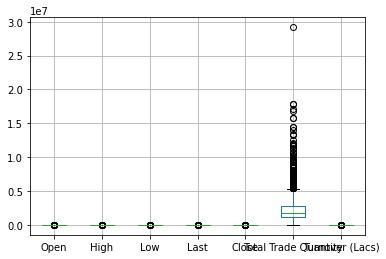

In [27]:
data.boxplot()

In [28]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5+IQR)
    upper_range=Q3+(1.5+IQR)
    return lower_range,upper_range

In [29]:
lower_e,upper_e=remove_outliers(data['Open'])
data['Open']=np.where(data['Open']>upper_e,upper_e,data['Open'])
data['Open']=np.where(data['Open']<lower_e,lower_e,data['Open'])

In [30]:
lower_e,upper_e=remove_outliers(data['High'])
data['High']=np.where(data['High']>upper_e,upper_e,data['High'])
data['High']=np.where(data['High']<lower_e,lower_e,data['High'])

In [31]:
lower_e,upper_e=remove_outliers(data['Low'])
data['Low']=np.where(data['Low']>upper_e,upper_e,data['Low'])
data['Low']=np.where(data['Low']<lower_e,lower_e,data['Low'])

In [32]:
lower_e,upper_e=remove_outliers(data['Last'])
data['Last']=np.where(data['Last']>upper_e,upper_e,data['Last'])
data['Last']=np.where(data['Last']<lower_e,lower_e,data['Last'])

In [33]:
lower_e,upper_e=remove_outliers(data['Close'])
data['Close']=np.where(data['Close']>upper_e,upper_e,data['Close'])
data['Close']=np.where(data['Close']<lower_e,lower_e,data['Close'])

In [34]:
lower_e,upper_e=remove_outliers(data['Total Trade Quantity'])
data['Total Trade Quantity']=np.where(data['Total Trade Quantity']>upper_e,upper_e,data['Total Trade Quantity'])
data['Total Trade Quantity']=np.where(data['Total Trade Quantity']<lower_e,lower_e,data['Total Trade Quantity'])

In [35]:
lower_e,upper_e=remove_outliers(data['Turnover (Lacs)'])
data['Turnover (Lacs)']=np.where(data['Turnover (Lacs)']>upper_e,upper_e,data['Turnover (Lacs)'])
data['Turnover (Lacs)']=np.where(data['Turnover (Lacs)']<lower_e,lower_e,data['Turnover (Lacs)'])

<AxesSubplot:>

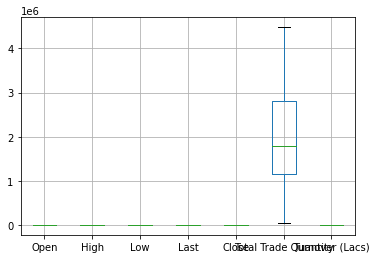

In [36]:
data.boxplot()

<function matplotlib.pyplot.show(close=None, block=None)>

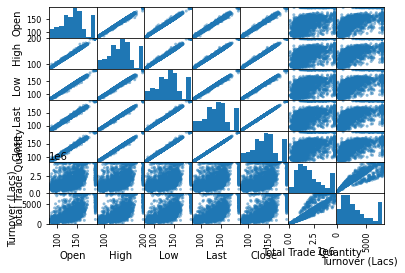

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show

In [38]:
data.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998379,0.998122,0.996518,0.996637,0.520693,0.722374
High,0.998379,1.000000,0.997949,0.998637,0.998712,0.540505,0.739050
Low,0.998122,0.997949,1.000000,0.998489,0.998605,0.512471,0.716711
Last,0.996518,0.998637,0.998489,1.000000,0.999927,0.531642,0.732054
Close,0.996637,0.998712,0.998605,0.999927,1.000000,0.531134,0.731572
Total Trade Quantity,0.520693,0.540505,0.512471,0.531642,0.531134,1.000000,0.936427
Turnover (Lacs),0.722374,0.739050,0.716711,0.732054,0.731572,0.936427,1.000000


In [39]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred=reg.predict(x_test)

In [43]:
from sklearn import metrics
print("accuracy:",metrics.r2_score(y_test,y_pred))

accuracy: 0.9619177409222487
